In [ ]:
!pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d rounakbanik/the-movies-dataset

the-movies-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip the-movies-dataset.zip

Archive:  the-movies-dataset.zip
replace credits.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: credits.csv             
  inflating: keywords.csv            
  inflating: links.csv               
  inflating: links_small.csv         
  inflating: movies_metadata.csv     
  inflating: ratings.csv             
  inflating: ratings_small.csv       


In [ ]:
import pandas as pd

In [ ]:
rating = pd.read_csv('ratings_small.csv')

In [ ]:
rating.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
rating = rating.iloc[:,0:3]

In [ ]:
rating.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


# Using MovieLens100K instead of MovieLens2M because my RAM Crashes on 2M points

In [ ]:
!pip3 install surprise

In [ ]:
import pandas as pd
from surprise import SVD, similarities
from surprise import Dataset, accuracy
from surprise import NormalPredictor
from surprise import Reader
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection import cross_validate, train_test_split, KFold

In [ ]:
from surprise import BaselineOnly

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(rating[['userId', 'movieId', 'rating']], reader)


The famous SVD algorithm, as popularized by Simon Funk during the Netflix Prize.
When baselines are not used, this is equivalent to Probabilistic Matrix Factorization 
[salakhutdinov2008a] (see note below)..

# 3 C

In [ ]:
# 3 c. [TYPE-1] Average MAE and RMSE for Probabilistic Matrix Factorization using 5 - Fold CF
algo = SVD()
results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8930  0.9040  0.9013  0.8913  0.8934  0.8966  0.0051  
MAE (testset)     0.6903  0.6970  0.6929  0.6864  0.6864  0.6906  0.0040  
Fit time          4.92    4.99    4.89    4.89    4.89    4.92    0.04    
Test time         0.33    0.17    0.33    0.15    0.16    0.23    0.08    


In [ ]:
print("MAE on Test Set using 5 fold CV", results['test_mae'].mean())
print("RMSE on Test Set using 5 fold CV", results['test_rmse'].mean())

MAE on Test Set using 5 fold CV 0.6906214017883393
RMSE on Test Set using 5 fold CV 0.896600488930272


In [ ]:
# 3 c. [TYPE-2] Average MAE and RMSE for Item Base Collaborative Filtering using 5 - Fold CF
sim_options = {
    "user_based": False,
}

knn_m = KNNWithMeans(sim_options=sim_options)
scores = cross_validate(knn_m, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

mean_mae = scores['test_mae'].mean()
mean_rsme = scores['test_rmse'].mean()

print(f'Average MAE: {mean_mae}')
print(f'Average RMSE: {mean_rsme}')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9144  0.9162  0.9239  0.9017  0.9084  0.9129  0.0075  
MAE (testset)     0.7024  0.7017  0.7055  0.6920  0.6965  0.6996  0.0048  
Fit time          4.88    4.61    4.15    4.10    4.07    4.36    0.32    
Test time         8.55    8.45    8.52    8.52    8.35    8.48    0.07    
Average MAE: 0.6996255634681613
Average RMSE: 0.9129240159765265


In [ ]:
# 3 c. [TYPE-3] Average MAE and RMSE for User Base Collaborative Filtering using 5 - Fold CF
sim_options = {
    "user_based": True,
}

knn_m = KNNWithMeans(sim_options=sim_options)
scores = cross_validate(knn_m, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

mean_mae = scores['test_mae'].mean()
mean_rsme = scores['test_rmse'].mean()

print(f'Average MAE: {mean_mae}')
print(f'Average RMSE: {mean_rsme}')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9286  0.9215  0.9173  0.9061  0.9145  0.9176  0.0075  
MAE (testset)     0.7110  0.7045  0.7031  0.6936  0.7012  0.7027  0.0056  
Fit time          0.18    0.20    0.22    0.21    0.21    0.21    0.01    
Test time         2.09    1.91    1.91    2.04    1.91    1.97    0.08    
Average MAE: 0.7026952955014842
Average RMSE: 0.9175981535360893


Report : <br>
Item Based Collaborative Filtering was better than User Based CF and PMF.<br>
MAE and RMSE Errors were less for Item-Based CF

## 3 E Effect of Cosine, MSD, Pearson Similarities on Collaborative Filtering

In [ ]:
# 3 e. [TYPE-1] Comparing Cosine, MSD, Pearson Similarities on Item Based CF
similarity_names = ['cosine','msd','pearson']
mean_mae_item = []
mean_rmse_item = []
for name in similarity_names:
  sim_options = {
    "user_based": False,
    "name": name
  }

  knn_m = KNNWithMeans(sim_options=sim_options)
  scores = cross_validate(knn_m, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

  mean_mae_item.append(scores['test_mae'].mean())
  mean_rmse_item.append(scores['test_rmse'].mean())


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9305  0.9200  0.9287  0.9237  0.9260  0.9258  0.0037  
MAE (testset)     0.7099  0.7060  0.7118  0.7103  0.7109  0.7098  0.0020  
Fit time          14.22   14.75   14.22   14.54   14.40   14.43   0.20    
Test time         8.32    8.32    8.29    8.37    8.32    8.32    0.03    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix.

In [ ]:
print(f'Similarity Measure: {similarity_names}')
print(f'Average MAE: {mean_mae_item}')
print(f'Average RMSE: {mean_rmse_item}')

Similarity Measure: ['cosine', 'msd', 'pearson']
Average MAE: [0.7097699197011977, 0.7004511594591187, 0.7072188984236631]
Average RMSE: [0.9257726628275578, 0.914326246743413, 0.9274994413777398]


In [ ]:
# 3 e. [TYPE-2] Comparing Cosine, MSD, Pearson Similarities on User Based CF
similarity_names = ['cosine','msd','pearson']
mean_mae_user = []
mean_rmse_user = []
for name in similarity_names:
  sim_options = {
    "user_based": True,
    "name": name
  }

  knn_m = KNNWithMeans(sim_options=sim_options)
  scores = cross_validate(knn_m, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

  mean_mae_user.append(scores['test_mae'].mean())
  mean_rmse_user.append(scores['test_rmse'].mean())


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9218  0.9183  0.9135  0.9285  0.9263  0.9217  0.0054  
MAE (testset)     0.7078  0.7050  0.6997  0.7096  0.7096  0.7063  0.0037  
Fit time          0.45    0.46    0.50    0.46    0.50    0.48    0.02    
Test time         2.00    2.07    1.93    1.98    2.07    2.01    0.05    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix.

In [ ]:
print(f'Similarity Measure: {similarity_names}')
print(f'Average MAE: {mean_mae_user}')
print(f'Average RMSE: {mean_rmse_user}')

Similarity Measure: ['cosine', 'msd', 'pearson']
Average MAE: [0.7063335993037307, 0.7040116253949179, 0.7050282375599093]
Average RMSE: [0.9216821418299576, 0.9197328141608094, 0.9238979977936289]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

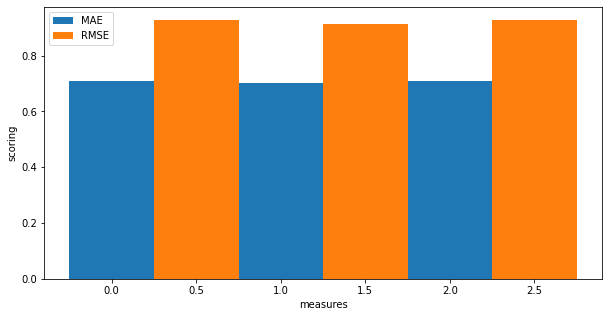

In [ ]:
ind = np.arange(len(similarity_names))
plt.figure(figsize=(10,5))
plt.bar(ind, mean_mae_item, 0.5, label='MAE')
plt.bar(ind + 0.5, mean_rmse_item, 0.5, label='RMSE')


plt.xlabel('measures')
plt.ylabel('scoring')


plt.legend(loc='best')
plt.show()

<Figure size 432x288 with 0 Axes>

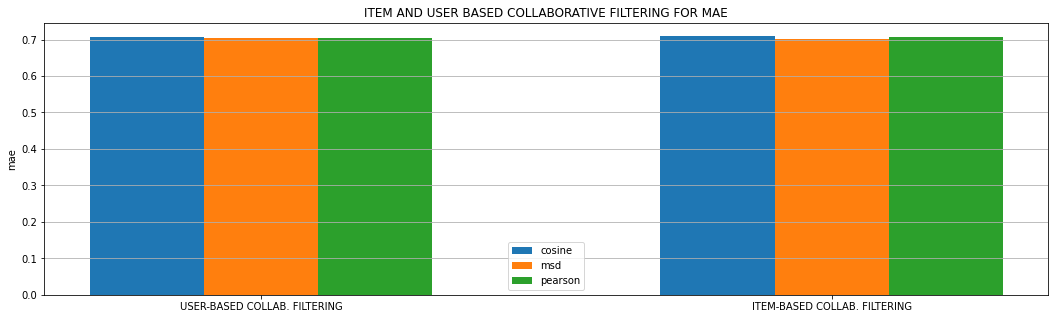

In [ ]:
ifig=1
labels = ['USER-BASED COLLAB. FILTERING', 'ITEM-BASED COLLAB. FILTERING']
x = np.arange(0, len(labels) * 2.5, 2.5)
width = 0.5
plt.figure(ifig)
fig, ax = plt.subplots(figsize=(18,5))
for i in range(len(similarity_names)):
    ax.bar(x - (width * len(similarity_names)) / 2 + i * width, [mean_mae_user[i], mean_mae_item[i]], width, label=similarity_names[i])
plt.xticks(x - width / 2, labels)
plt.title('ITEM AND USER BASED COLLABORATIVE FILTERING FOR MAE')
plt.ylabel('mae')
plt.grid(axis='y')
plt.legend()
plt.show()

Impact of K on Collaborative Filtering

In [ ]:
#3f)
ks = np.arange(1, 20, 1)


ub_mae = []
ub_rmse = []

for k in ks: 
    
    sim_options = {
    "user_based": True, 
    }
    
    
    knn_m = KNNWithMeans(k, sim_options=sim_options)
    scores = cross_validate(knn_m, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    
    
    mean_mae = scores['test_mae'].mean()
    mean_rsme = scores['test_rmse'].mean()
    
   
    ub_mae.append(mean_mae)
    ub_rmse.append(mean_rsme)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1525  1.1491  1.1560  1.1438  1.1478  1.1498  0.0042  
MAE (testset)     0.8872  0.8826  0.8938  0.8812  0.8841  0.8858  0.0045  
Fit time          0.18    0.22    0.23    0.23    0.23    0.22    0.02    
Test time         1.04    1.02    1.12    1.02    1.11    1.06    0.04    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [ ]:
ib_mae = []
ib_rmse = []

for k in ks: 
    sim_options = {
    "user_based": False,  
    }
    
    knn_m = KNNWithMeans(k, sim_options=sim_options)
    scores = cross_validate(knn_m, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    
    mean_mae = scores['test_mae'].mean()
    mean_rsme = scores['test_rmse'].mean()
    
    ib_mae.append(mean_mae)
    ib_rmse.append(mean_rsme)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1735  1.1759  1.1839  1.1750  1.1799  1.1776  0.0038  
MAE (testset)     0.8966  0.8961  0.9082  0.9032  0.9025  0.9013  0.0045  
Fit time          4.15    4.10    4.19    4.88    4.19    4.30    0.29    
Test time         6.24    6.31    6.11    6.35    6.04    6.21    0.12    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

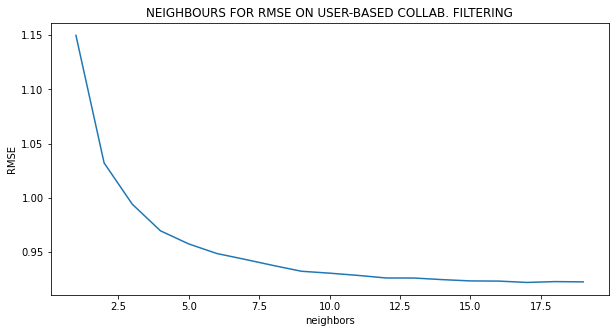

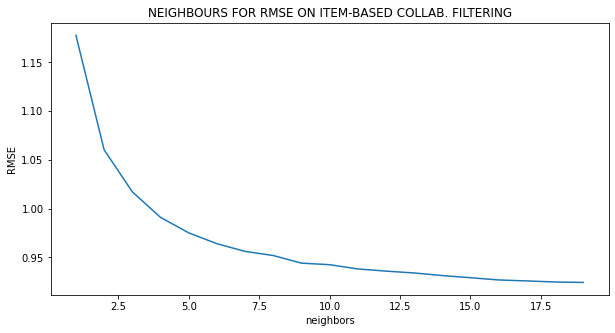

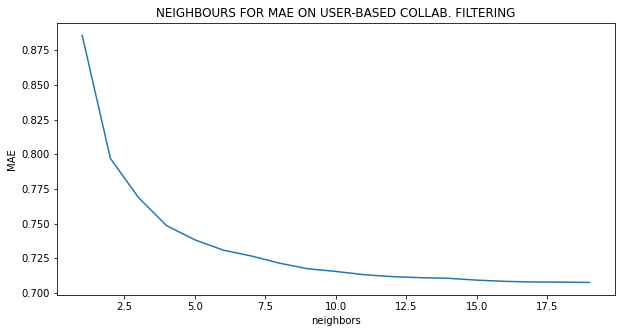

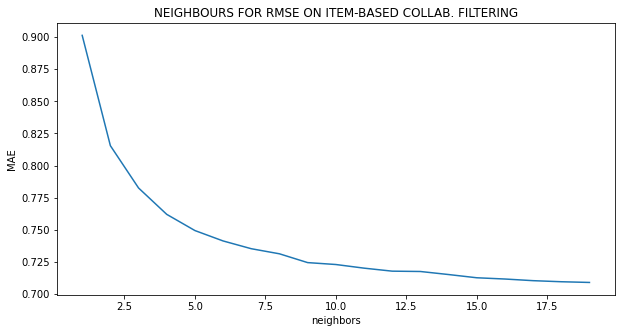

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(ks, ub_rmse)
plt.title('NEIGHBOURS FOR RMSE ON USER-BASED COLLAB. FILTERING')
plt.xlabel('neighbors')
plt.ylabel('RMSE')

plt.show()

plt.figure(figsize=(10,5))
plt.plot(ks, ib_rmse)
plt.title('NEIGHBOURS FOR RMSE ON ITEM-BASED COLLAB. FILTERING')
plt.xlabel('neighbors')
plt.ylabel('RMSE')

plt.show()

plt.figure(figsize=(10,5))
plt.plot(ks, ub_mae)
plt.title('NEIGHBOURS FOR MAE ON USER-BASED COLLAB. FILTERING')
plt.xlabel('neighbors')
plt.ylabel('MAE')

plt.show()

plt.figure(figsize=(10,5))
plt.plot(ks, ib_mae)
plt.title('NEIGHBOURS FOR RMSE ON ITEM-BASED COLLAB. FILTERING')
plt.xlabel('neighbors')
plt.ylabel('MAE')


plt.show()



In [ ]:
#3g)
print('USER-BASED COLLAB. FILTERING - MAE')
print('Best K: ', ks[np.argmin(ub_mae)])
print('Best K MAE: ', np.min(ub_mae))

print('\nUSER-BASED COLLAB. FILTERING - RMSE')
print('Best K: ', ks[np.argmin(ub_rmse)])
print('Best K RMSE: ', np.min(ub_rmse))

print('\nITEM-BASED COLLAB. FILTERING - MAE')
print('Best K: ', ks[np.argmin(ib_mae)])
print('Best K MAE: ', np.min(ib_mae))

print('\nITEM-BASED COLLAB. FILTERING - RMSE')
print('Best K: ', ks[np.argmin(ib_rmse)])
print('Best K RMSE: ', np.min(ib_rmse))

USER-BASED COLLAB. FILTERING - MAE
Best K:  19
Best K MAE:  0.7075470630327005

USER-BASED COLLAB. FILTERING - RMSE
Best K:  17
Best K RMSE:  0.9221970760811438

ITEM-BASED COLLAB. FILTERING - MAE
Best K:  19
Best K MAE:  0.7091130039311003

ITEM-BASED COLLAB. FILTERING - RMSE
Best K:  19
Best K RMSE:  0.9242947995986487
